## House Price Prediction

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

- import data

In [3]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# data shape and type
print(data.shape)
data.info()

(20640, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# checking for null values
data.isna().mean()*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [6]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

**Impute Missing total_bedrooms values with median of that column**

In [7]:
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

In [8]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


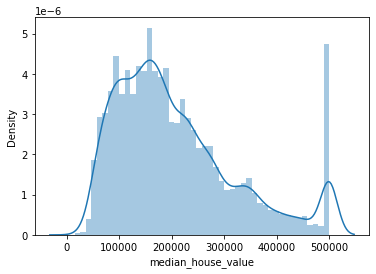

In [28]:
# prediction variable distribution
sns.distplot(data['median_house_value'])
plt.show()

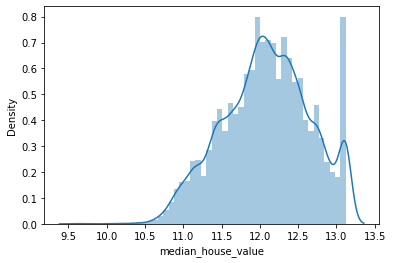

In [29]:
# lets try log transform of the predict value
new_target = np.log(data['median_house_value'])

# distplot of the new_target 
sns.distplot(new_target)
plt.show()

## Data Modelling

In [10]:
# create dummies for catagorical vairable

data_new = pd.get_dummies(data)
data_new.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


### Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split
X = data_new.drop('median_house_value', axis=1)
y = data_new.median_house_value


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
print(X_train.shape)
print(y_train.shape)
print('============')
print(X_test.shape)
print(y_test.shape)

(14448, 13)
(14448,)
(6192, 13)
(6192,)


### Scaling the data

In [13]:
# scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cols = X_train.columns

X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [14]:
X_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,0.474691,0.329858,0.540694,0.081010,0.083617,0.039937,0.082235,0.232893,0.443868,0.319283,0.000277,0.112195,0.124377
std,0.199495,0.227207,0.247326,0.066301,0.065144,0.031958,0.062855,0.131371,0.496856,0.466215,0.016637,0.315618,0.330023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253984,0.147872,0.333333,0.044590,0.045779,0.022086,0.045881,0.142572,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.581673,0.182979,0.549020,0.065257,0.067660,0.032652,0.067423,0.209597,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.631474,0.550000,0.705882,0.097080,0.100403,0.048320,0.099655,0.293663,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Machine Learning Model Building

In [15]:
from sklearn.linear_model import LinearRegression
lgr = LinearRegression()

lgr.fit(X_train, y_train)
lgr.get_params

<bound method BaseEstimator.get_params of LinearRegression()>

In [16]:
y_test_pred = lgr.predict(X_test)

### Evaluation

In [17]:
from sklearn.metrics import r2_score

In [18]:
r2_score(y_test, y_test_pred)

0.6393611711434394

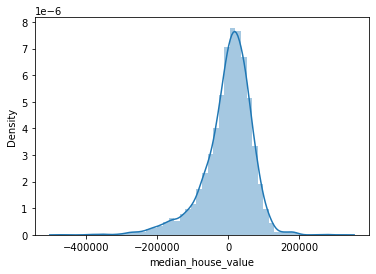

In [20]:
# residual distribution plot
residuals = y_test_pred-y_test

sns.distplot(residuals)
plt.show()

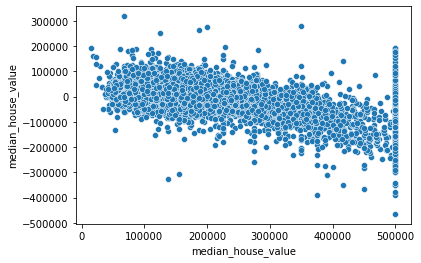

In [19]:
# residual scatter plot

sns.scatterplot(y_test, residuals)
plt.show()

The Scatter plot has some pattern, so lets use Ridge Regression to penalize.

## Ridge Regression Model Building

In [36]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.6)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.6)

In [37]:
y_test_ridge_pred = ridge_model.predict(X_test)

### Evaluation

In [38]:
r2_score(y_test, y_test_ridge_pred)

0.6391595924010085

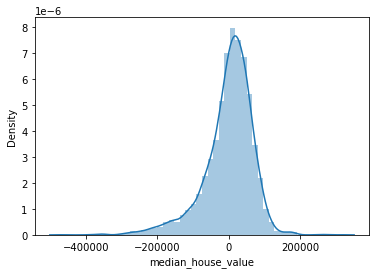

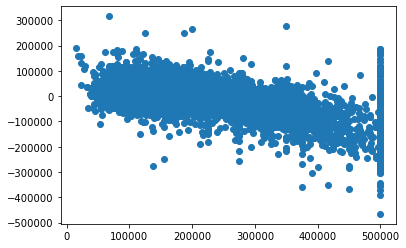

In [48]:
# residual distribution plot
residuals = y_test_ridge_pred-y_test

sns.distplot(residuals)
plt.show()

# residual scatter plot

plt.scatter(y_test, residuals)
plt.show()

## Random Forest Model Building

In [41]:
from sklearn.ensemble import RandomForestRegressor
rfRegg = RandomForestRegressor()

rfRegg.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
y_test_random_pred = rfRegg.predict(X_test)

In [43]:
r2_score(y_test, y_test_random_pred)

0.8199512145850478

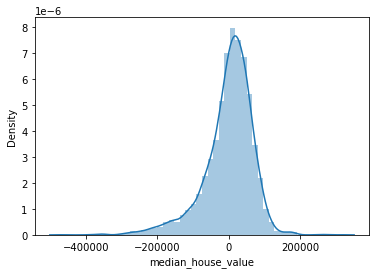

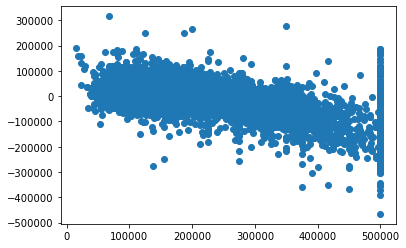

In [47]:
# residual distribution plot
residuals = y_test_ridge_pred-y_test

sns.distplot(residuals)
plt.show()

# residual scatter plot

plt.scatter(y_test, residuals)
plt.show()

### As we could see from the above model, Random Forest Model Performed the Best with r2_score of 81.9%